# NFL Elimination Picks

reqs:
```
pip install requests numpy scipy pandas matplotlib parsel
```

In [1]:
import datetime
import math
import random

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#%load_ext autoreload
#%autoreload 2

In [3]:
import anysunday
import anysunday.powercalcs
from anysunday import viz, pick

In [4]:
schedule = anysunday.loaders.espn_schedule("./schedules/2022.espn")

https://www.espn.com/nfl/fpi

In [5]:
powers = anysunday.loaders.espn_powers()
powers

{'TB': 8.1,
 'GB': 7.0,
 'BUF': 5.8,
 'CIN': 5.6,
 'BAL': 5.4,
 'KC': 4.9,
 'LAC': 3.7,
 'LAR': 3.0,
 'PHI': 2.9,
 'MIA': 1.7,
 'MIN': 1.0,
 'SF': 1.0,
 'LV': 0.9,
 'NO': 0.7,
 'ARI': 0.7,
 'WSH': 0.6,
 'IND': 0.5,
 'CAR': -0.0,
 'NE': -0.3,
 'DEN': -0.6,
 'CLE': -0.6,
 'JAX': -1.0,
 'TEN': -1.4,
 'PIT': -2.7,
 'NYG': -4.4,
 'DET': -4.5,
 'ATL': -5.3,
 'NYJ': -5.5,
 'HOU': -5.8,
 'DAL': -6.2,
 'CHI': -6.9,
 'SEA': -8.4}

In [6]:
top_picks = list(powers)[:len(schedule)]
best_pick = None
best_pick_fitness = -100

def fitness(scores):
    return 100 * min(scores) + sum(scores)

def fitness(scores):
    return 50 * (min(scores) - 3) + sum(scores)

picks = []

HOME_POWER_BUMP = 3.0

for n in range(250_000):
    this_pick = top_picks[:]
    random.shuffle(this_pick)
    try:
        scores = anysunday.powercalcs.pick_power_calculator(powers, schedule, this_pick)
    except ValueError:
        continue
    
    pick_fitness = fitness(scores)
    
    if pick_fitness < 0:
        continue

    picks.append([min(scores), sum(scores)])
    
    if pick_fitness < best_pick_fitness:
        continue
    
    print("new high score, round {:>9d}, fitness={:+3.1f}".format(n, pick_fitness))
    best_pick = this_pick
    best_scores = scores
    best_pick_fitness = pick_fitness


new high score, round     37481, fitness=+24.0
new high score, round     42280, fitness=+27.4
new high score, round     50067, fitness=+79.6
new high score, round     65587, fitness=+94.7
new high score, round    106070, fitness=+101.9
new high score, round    245269, fitness=+123.9


In [7]:
anysunday.powercalcs.pick_power_calculator(powers, schedule, best_pick, verbose=True)

week  1: diff +11.3 - picking TB  (+8.1  ) over DAL (-6.2+H)
week  2: diff  +4.2 - picking KC  (+4.9+H) over LAC (+3.7  )
week  3: diff  +7.7 - picking LAC (+3.7+H) over JAX (-1.0  )
week  4: diff  +4.9 - picking IND (+0.5+H) over TEN (-1.4  )
week  5: diff +10.9 - picking MIN (+1.0+H) over CHI (-6.9  )
week  6: diff +12.1 - picking PHI (+2.9+H) over DAL (-6.2  )
week  7: diff  +9.7 - picking LV  (+0.9+H) over HOU (-5.8  )
week  8: diff  +2.8 - picking NO  (+0.7+H) over LV  (+0.9  )
week  9: diff  +5.6 - picking MIA (+1.7  ) over CHI (-6.9+H)
week 10: diff  +7.8 - picking BUF (+5.8+H) over MIN (+1.0  )
week 11: diff +11.4 - picking GB  (+7.0+H) over TEN (-1.4  )
week 12: diff  +3.3 - picking SF  (+1.0+H) over NO  (+0.7  )
week 13: diff  +3.7 - picking CIN (+5.6+H) over KC  (+4.9  )
week 14: diff  +5.4 - picking CAR (-0.0  ) over SEA (-8.4+H)
week 15: diff  +8.0 - picking WSH (+0.6+H) over NYG (-4.4  )
week 16: diff +13.7 - picking BAL (+5.4+H) over ATL (-5.3  )
week 17: diff  +3.0 - pi

[11.3,
 4.2,
 7.7,
 4.9,
 10.9,
 12.1,
 9.7,
 2.8,
 5.6,
 7.8,
 11.4,
 3.3,
 3.6999999999999993,
 5.4,
 8.0,
 13.7,
 3.0,
 8.4]

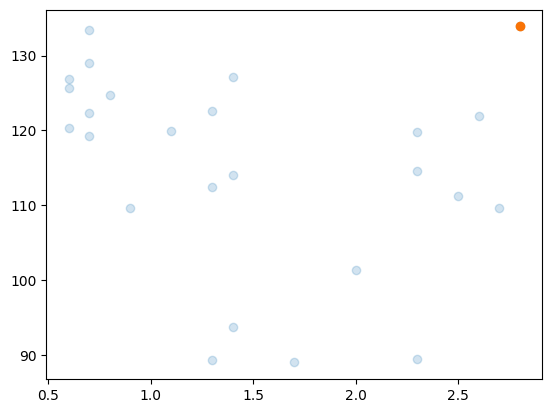

In [8]:
best_scores = anysunday.powercalcs.pick_power_calculator(powers, schedule, best_pick)
best_point = [min(best_scores), sum(best_scores)]

f, ax = plt.subplots()
ax.scatter(*zip(*picks), alpha=0.2)

ax.scatter(*best_point, color="xkcd:orange")

(<Figure size 800x1000 with 2 Axes>,
 <AxesSubplot: xlabel='Week', ylabel='Pick to Win'>)

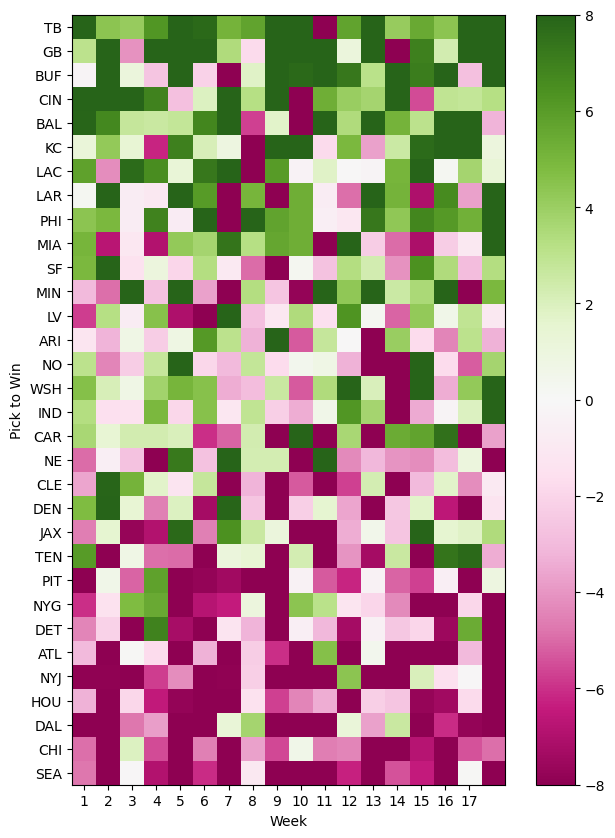

In [9]:
power_rank, matrix = anysunday.powercalcs.pick_grid(powers, schedule, home_bump=3)

viz.plot_matrix(matrix, power_rank)

In [10]:
my_past_picks = [
    "BAL", # week 1
    "GB",  # week 2
]

tuned_home_bump = 1.5

ppkwargs = {
    "powers": powers,
    "schedule": schedule,
    "home_bump": tuned_home_bump,
    "past_picks": my_past_picks
}

In [11]:
pp = pick.Permuter(**ppkwargs)

pprev = pick.Permuter(**ppkwargs)
pprev.pick = pprev.reverse_greedy()

pprand = pick.Permuter(**ppkwargs)
pprand.pick = pprand.random_greedy()

pplg = pick.Permuter(**ppkwargs)
pplg.pick = pplg.limited_greedy(limit=8)

In [12]:
pp.describe_pick()

week  3: diff  +9.6 - picking CIN (+5.6  ) over NYJ (-5.5+H)
week  4: diff  +8.0 - picking LAC (+3.7  ) over HOU (-5.8+H)
week  5: diff +14.9 - picking TB  (+8.1+H) over ATL (-5.3  )
week  6: diff +10.6 - picking PHI (+2.9+H) over DAL (-6.2  )
week  7: diff  +8.2 - picking LV  (+0.9+H) over HOU (-5.8  )
week  8: diff  +4.7 - picking MIA (+1.7  ) over DET (-4.5+H)
week  9: diff +10.6 - picking ARI (+0.7+H) over SEA (-8.4  )
week 10: diff  +7.4 - picking KC  (+4.9+H) over JAX (-1.0  )
week 11: diff  +8.7 - picking MIN (+1.0+H) over DAL (-6.2  )
week 12: diff  +8.8 - picking BUF (+5.8  ) over DET (-4.5+H)
week 13: diff +12.9 - picking LAR (+3.0+H) over SEA (-8.4  )
week 14: diff  +6.9 - picking CAR (-0.0  ) over SEA (-8.4+H)
week 15: diff  +7.9 - picking SF  (+1.0  ) over SEA (-8.4+H)
week 16: diff  +5.9 - picking TEN (-1.4+H) over HOU (-5.8  )
week 17: diff  +3.9 - picking DET (-4.5+H) over CHI (-6.9  )
week 18: diff  +8.3 - picking WSH (+0.6+H) over DAL (-6.2  )


In [13]:
pprev.describe_pick()

week  3: diff  +3.6 - picking CLE (-0.6+H) over PIT (-2.7  )
week  4: diff  +5.4 - picking DET (-4.5+H) over SEA (-8.4  )
week  5: diff +10.6 - picking NO  (+0.7+H) over SEA (-8.4  )
week  6: diff  +6.0 - picking WSH (+0.6  ) over CHI (-6.9+H)
week  7: diff +13.6 - picking LAC (+3.7+H) over SEA (-8.4  )
week  8: diff  +3.7 - picking NE  (-0.3  ) over NYJ (-5.5+H)
week  9: diff +10.6 - picking ARI (+0.7+H) over SEA (-8.4  )
week 10: diff  +6.8 - picking CAR (-0.0+H) over ATL (-5.3  )
week 11: diff  +8.7 - picking MIN (+1.0+H) over DAL (-6.2  )
week 12: diff  +9.0 - picking MIA (+1.7+H) over HOU (-5.8  )
week 13: diff +12.9 - picking LAR (+3.0+H) over SEA (-8.4  )
week 14: diff  +7.7 - picking CIN (+5.6+H) over CLE (-0.6  )
week 15: diff  +8.3 - picking PHI (+2.9  ) over CHI (-6.9+H)
week 16: diff +11.2 - picking BUF (+5.8  ) over CHI (-6.9+H)
week 17: diff  +7.0 - picking KC  (+4.9+H) over DEN (-0.6  )
week 18: diff +11.9 - picking TB  (+8.1  ) over ATL (-5.3+H)


In [14]:
pprand.describe_pick()

week  3: diff  +9.6 - picking CIN (+5.6  ) over NYJ (-5.5+H)
week  4: diff  +5.4 - picking DET (-4.5+H) over SEA (-8.4  )
week  5: diff +10.6 - picking NO  (+0.7+H) over SEA (-8.4  )
week  6: diff +10.6 - picking PHI (+2.9+H) over DAL (-6.2  )
week  7: diff +13.6 - picking LAC (+3.7+H) over SEA (-8.4  )
week  8: diff  +3.8 - picking CAR (-0.0  ) over ATL (-5.3+H)
week  9: diff  +1.1 - picking WSH (+0.6+H) over MIN (+1.0  )
week 10: diff  +7.4 - picking KC  (+4.9+H) over JAX (-1.0  )
week 11: diff  +6.7 - picking NE  (-0.3+H) over NYJ (-5.5  )
week 12: diff  +9.0 - picking MIA (+1.7+H) over HOU (-5.8  )
week 13: diff  +8.0 - picking MIN (+1.0+H) over NYJ (-5.5  )
week 14: diff  +2.5 - picking ARI (+0.7+H) over NE  (-0.3  )
week 15: diff  +7.9 - picking SF  (+1.0  ) over SEA (-8.4+H)
week 16: diff +11.2 - picking BUF (+5.8  ) over CHI (-6.9+H)
week 17: diff  +9.6 - picking TB  (+8.1+H) over CAR (-0.0  )
week 18: diff  +9.9 - picking LAR (+3.0  ) over SEA (-8.4+H)


In [15]:
pplg.describe_pick()

week  3: diff  +9.6 - picking CIN (+5.6  ) over NYJ (-5.5+H)
week  4: diff  +8.0 - picking LAC (+3.7  ) over HOU (-5.8+H)
week  5: diff  +9.4 - picking MIN (+1.0+H) over CHI (-6.9  )
week  6: diff  +9.3 - picking TB  (+8.1  ) over PIT (-2.7+H)
week  7: diff  +8.1 - picking NE  (-0.3+H) over CHI (-6.9  )
week  8: diff  +7.1 - picking PHI (+2.9+H) over PIT (-2.7  )
week  9: diff  +9.8 - picking BUF (+5.8  ) over NYJ (-5.5+H)
week 10: diff  +7.4 - picking KC  (+4.9+H) over JAX (-1.0  )
week 11: diff  +4.9 - picking WSH (+0.6  ) over HOU (-5.8+H)
week 12: diff  +9.0 - picking MIA (+1.7+H) over HOU (-5.8  )
week 13: diff +12.9 - picking LAR (+3.0+H) over SEA (-8.4  )
week 14: diff  +6.9 - picking CAR (-0.0  ) over SEA (-8.4+H)
week 15: diff  +7.9 - picking SF  (+1.0  ) over SEA (-8.4+H)
week 16: diff  +5.9 - picking TEN (-1.4+H) over HOU (-5.8  )
week 17: diff  +4.5 - picking ARI (+0.7  ) over ATL (-5.3+H)
week 18: diff  +7.8 - picking IND (+0.5+H) over HOU (-5.8  )


In [16]:
import contextlib
import ctypes
import multiprocessing
import queue
import time

In [17]:
def check_until_when(done_flag, best_q, trial_counter=None, permuter=None, method_name="random_greedy"):
    global ppkwargs
    if permuter is None:
        permuter = pick.Permuter(**ppkwargs)

    best_picks = []
    best_fitness = -100
    trials = 0
    while not done_flag.is_set():
        permuter.pick = getattr(permuter, method_name)()

        if permuter.fitness > best_fitness:
            best_picks = permuter.pick
            best_fitness = permuter.fitness
            best_q.put((best_picks, best_fitness))
        trials += 1
        
    if trial_counter is not None:
        with trial_counter.get_lock():
            trial_counter.value += trials
    return trials

In [18]:
class TestFlag:
    def __init__(self, n_checks=1000):
        self.remaining = n_checks
    def is_set(self):
        self.remaining -= 1
        return self.remaining <= 0
        
test_q = queue.Queue()
start = time.monotonic()
trials = check_until_when(TestFlag(40_000), test_q)
elapsed = time.monotonic() - start
print(f"{trials/elapsed/1000:0.3f}k trials/sec over {elapsed:0.3f} sec")

7.549k trials/sec over 5.299 sec


In [26]:
proc_time = 60  # desired processing time
n_proc = 24

best_picks = []
best_fitness = -100

done_flag = multiprocessing.Event()
new_best_q = multiprocessing.Queue()
trial_counter = multiprocessing.Value(ctypes.c_long, 0)
processes = [
    multiprocessing.Process(target=check_until_when, args=(done_flag, new_best_q, trial_counter))
    for n
    in range(n_proc)
]

for p in processes:
    p.start()
    
start = time.monotonic()
elapsed = 0
while (elapsed < proc_time) or not new_best_q.empty:
    elapsed = time.monotonic() - start
    if elapsed >= proc_time:
        done_flag.set()
        for p in processes:
            p.join()

    try:
        proc_best_picks, proc_best_fitness = new_best_q.get(timeout=0.1)
        if proc_best_fitness > best_fitness:
            best_picks, best_fitness = proc_best_picks, proc_best_fitness
            # elide already picked picks
            if my_past_picks:
                best_picks = ["..."] + best_picks[len(my_past_picks):]
            print(f"New best {best_fitness/1000:6.1f}k, via: {', '.join(best_picks)}")
    except queue.Empty:
        pass
                
print(f"Tried {trial_counter.value:,d} permutations in {elapsed:0.1f} sec "
      f"({trial_counter.value/elapsed/1000:0.3f}k/sec, {trial_counter.value/elapsed/n_proc/1000:0.3f}k/sec/worker)")

New best  559.3k, via: ..., CIN, LAC, TB, ARI, LV, MIA, WSH, CAR, MIN, IND, LAR, DAL, KC, BUF, TEN, PHI
New best 1104.7k, via: ..., CIN, DET, TB, PHI, LAC, NE, ARI, LAR, MIN, MIA, IND, BUF, SF, CAR, KC, WSH
New best 1486.7k, via: ..., CIN, DET, NO, ARI, LAC, PHI, MIA, KC, NE, LV, IND, BUF, SF, MIN, TB, LAR
New best 1522.2k, via: ..., CIN, DET, TB, WSH, LAC, PHI, ARI, CAR, MIN, LV, LAR, BUF, SF, TEN, KC, MIA
New best 1696.5k, via: ..., CIN, LAC, NO, WSH, LV, PHI, ARI, CAR, NE, MIA, MIN, BUF, SF, KC, TB, LAR
New best 1725.3k, via: ..., CIN, LAC, NO, WSH, LV, PHI, ARI, CAR, MIN, MIA, LAR, BUF, SF, KC, TB, IND
New best 1768.0k, via: ..., CIN, LAC, NO, TB, LV, PHI, ARI, CAR, MIN, MIA, LAR, BUF, SF, KC, TEN, WSH
New best 1772.5k, via: ..., CIN, LAC, NO, ARI, LV, PHI, MIA, TB, MIN, WSH, LAR, BUF, SF, KC, TEN, IND
New best 1791.7k, via: ..., MIN, LAC, NO, ARI, CIN, PHI, MIA, CAR, NE, LV, LAR, BUF, SF, KC, TB, WSH
New best 1793.5k, via: ..., CIN, LAC, NO, ARI, LV, PHI, KC, CAR, NE, MIA, LAR, BU

## FiveThirtyEight Elo Data

* Links
    * https://projects.fivethirtyeight.com/2022-nfl-predictions/
    * https://github.com/fivethirtyeight/data/tree/master/nfl-elo
* Important Fields
    * `team1`	Abbreviation for home team
    * `team2`	Abbreviation for away team
    * `qbelo_prob1`	Home team's probability of winning according to quarterback-adjusted Elo
    * `qbelo_prob2`	Away team's probability of winning according to quarterback-adjusted Elo

In [27]:
data = anysunday.loaders.five38_elos()

In [28]:
data.shape

(272, 33)

In [29]:
data

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
0,2022-09-08,2022,0,NaN,LAR,BUF,1614.761436,1614.246762,0.593181,0.406819,...,402.149420,175.505078,273.860644,1549.330347,1646.634779,10.0,31.0,91,59,75
1,2022-09-11,2022,0,NaN,CAR,CLE,1411.401199,1502.038750,0.463171,0.536829,...,73.180207,90.495150,113.312863,1403.853075,1500.647304,24.0,26.0,10,48,29
2,2022-09-11,2022,0,NaN,ATL,NO,1436.671709,1543.815038,0.439647,0.560353,...,151.832530,131.818353,151.145557,1374.515041,1520.814596,26.0,27.0,19,54,37
3,2022-09-11,2022,0,NaN,NYJ,BAL,1364.983381,1508.988219,0.388223,0.611777,...,112.207146,110.835816,157.662356,1370.565348,1566.536000,9.0,24.0,34,51,43
4,2022-09-11,2022,0,NaN,CHI,SF,1444.508387,1576.152105,0.405251,0.594749,...,19.897502,104.175533,109.832664,1442.478111,1533.010665,19.0,10.0,37,59,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2023-01-08,2022,0,NaN,WSH,DAL,1450.494338,1543.126912,0.460317,0.539683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,92,71
268,2023-01-08,2022,0,NaN,PIT,CLE,1511.805374,1499.809789,0.609027,0.390973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,90,70
269,2023-01-08,2022,0,NaN,SEA,LAR,1508.373311,1583.678757,0.485174,0.514826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,86,62
270,2023-01-08,2022,0,NaN,DEN,LAC,1457.781797,1512.681274,0.514532,0.485468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,94,81


In [30]:
import dateutil.parser

NUM_TEAMS = 32
NUM_WEEKS = len(schedule)

WEEK_1_WED = datetime.datetime(year=2022, month=9, day=7)
TEAM_RENAMES = {
    "OAK": "LV",  # Raiders
}

def date_to_week(date):
    if not isinstance(date, datetime.datetime):
        date = dateutil.parser.parse(date)
    day_diff = (date - WEEK_1_WED) / datetime.timedelta(days=1)
    return int((day_diff // 7) + 1)

def pick_grid_538(data):
    powers = {}
    matches = []
    for _index, row in data.iterrows():
        week = date_to_week(row["date"])
        if week > NUM_WEEKS: 
            break
        for n in "12":
            team = row[f"team{n}"]
            elo = row[f"qbelo{n}_post"]
            p_win = row[f"qbelo_prob{n}"]
            if not math.isnan(elo):
                powers[team] = elo
            matches.append((team, week, p_win))

    index = sorted(powers, key=lambda t: powers[t])
    matrix = [[-10] * NUM_TEAMS for _ in range(NUM_WEEKS)]
    for team, week, p_win in matches:
        matrix[week - 1][index.index(team)] = 20 * (p_win - 0.5)
    
    # 538 uses old names as they have historical(ish) data
    index = [TEAM_RENAMES.get(n, n) for n in index]
    return index, matrix

(<Figure size 800x1000 with 2 Axes>,
 <AxesSubplot: xlabel='Week', ylabel='Pick to Win'>)

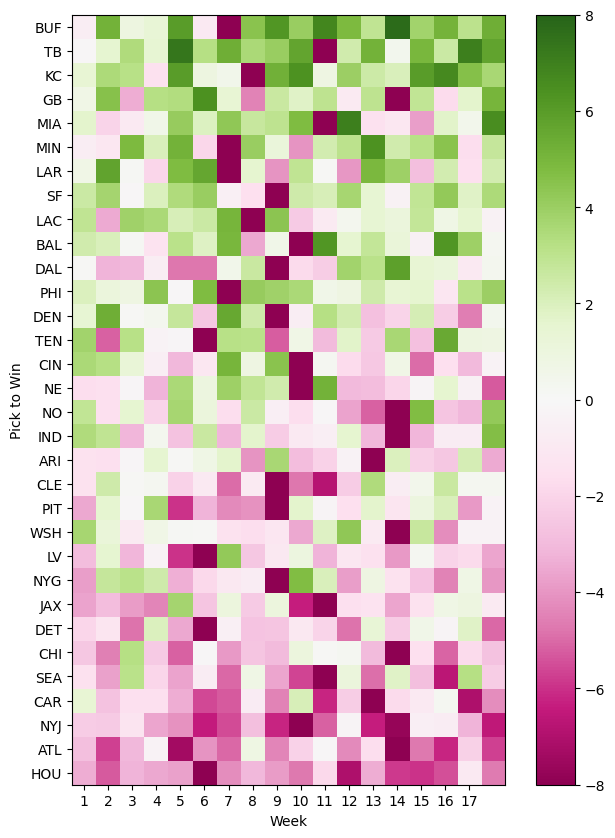

In [31]:
index538, matrix538 = pick_grid_538(data)
viz.plot_matrix(matrix538, index538)

In [32]:
class ProbPickPermuter(pick.Permuter):
    def __init__(self, df, past_picks=None):
        self.past_picks = past_picks or []
        self.n_weeks = NUM_WEEKS

        self.df = df.copy()
        self.df["week"] = self.df["date"].apply(date_to_week)
        
        # ignore postseason games
        self.df = self.df[self.df["week"] <= NUM_WEEKS]
    
        self.grid_index, self.grid = pick_grid_538(self.df)
        
        self.pick = self.greedy()
        
    @property
    def pick_score(self):
        scores = []
        for week in range(NUM_WEEKS):
            pick = self.pick[week]
            pick_index = self.grid_index.index(pick)
            scores.append(self.grid[week][pick_index])
        return scores

In [33]:
ppp = ProbPickPermuter(data, past_picks=my_past_picks)
ppp.pick = ppp.greedy()
ppp.fitness

772096.601820821

In [35]:
ppp = ProbPickPermuter(data, past_picks=my_past_picks)

best_538_picks = []
best_538_fitness = -100
for n in range(100_000):
    ppp.pick = ppp.random_greedy()
    
    if ppp.fitness > best_538_fitness:
        print("new best fitness", int(ppp.fitness))
        best_538_picks = ppp.pick
        print(" ".join(format(p, ">3s") for p in best_538_picks))
        best_538_fitness = ppp.fitness
        
ppp.pick = best_538_picks
ppp.pick 

new best fitness 701593
BAL  GB MIN PHI MIA LAR DEN  NO BUF  TB  NE WSH CLE DAL  KC TEN SEA IND
new best fitness 767173
BAL  GB MIN PHI JAX  SF DEN TEN CIN NYG  NE BUF LAR DAL  NO  KC  TB MIA
new best fitness 835090
BAL  GB MIN PIT  KC PHI DEN BUF CIN NYG  NE MIA LAR DAL  NO TEN  TB IND
new best fitness 841196
BAL  GB LAC PHI  KC LAR DEN BUF CIN NYG  NE WSH MIN DAL  NO TEN  TB MIA
new best fitness 847417
BAL  GB LAC PHI  TB LAR DEN BUF CIN NYG  NE MIA MIN DAL  NO TEN  KC IND
new best fitness 860171
BAL  GB MIN PHI LAR  SF DEN BUF CIN NYG  NE MIA  TB DAL  NO TEN  KC IND
new best fitness 860482
BAL  GB MIN PHI  KC  SF DEN BUF CIN NYG  NE MIA LAR DAL  NO TEN  TB IND


['BAL',
 'GB',
 'MIN',
 'PHI',
 'KC',
 'SF',
 'DEN',
 'BUF',
 'CIN',
 'NYG',
 'NE',
 'MIA',
 'LAR',
 'DAL',
 'NO',
 'TEN',
 'TB',
 'IND']

In [36]:
proc_time = 60  # desired processing time
n_proc = 24

best_picks = []
best_fitness = -100

done_flag = multiprocessing.Event()
new_best_q = multiprocessing.Queue()
trial_counter = multiprocessing.Value(ctypes.c_long, 0)
processes = [
    multiprocessing.Process(target=check_until_when, args=(
        done_flag, new_best_q, trial_counter, ProbPickPermuter(data, past_picks=my_past_picks),
    ))
    for n
    in range(n_proc)
]

for p in processes:
    p.start()
    
start = time.monotonic()
elapsed = 0
while (elapsed < proc_time) or not new_best_q.empty:
    elapsed = time.monotonic() - start
    if elapsed >= proc_time:
        done_flag.set()
        for p in processes:
            p.join()

    try:
        proc_best_picks, proc_best_fitness = new_best_q.get(timeout=0.1)
        if proc_best_fitness > best_fitness:
            best_picks, best_fitness = proc_best_picks, proc_best_fitness
            # elide already picked picks
            if my_past_picks:
                best_picks = ["..."] + best_picks[len(my_past_picks):]
            print(f"New best {best_fitness/1000:6.1f}k, via: {', '.join(best_picks)}")
    except queue.Empty:
        pass
                
print(f"Tried {trial_counter.value:,d} permutations in {elapsed:0.1f} sec "
      f"({trial_counter.value/elapsed/1000:0.3f}k/sec, {trial_counter.value/elapsed/n_proc/1000:0.3f}k/sec/worker)")

New best  725.0k, via: ..., LAC, PHI, JAX, LAR, DEN, NO, CIN, MIA, NE, WSH, MIN, DAL, KC, TEN, TB, BUF
New best  782.4k, via: ..., LAC, PHI, JAX, LAR, DEN, MIN, CIN, NYG, NE, MIA, CLE, BUF, KC, TEN, TB, IND
New best  785.0k, via: ..., LAC, PHI, TB, LAR, DEN, BUF, CIN, NYG, NE, WSH, MIN, DAL, NO, KC, SEA, MIA
New best  797.2k, via: ..., MIN, PIT, JAX, SF, DEN, PHI, BUF, MIA, NE, WSH, LAR, DAL, NO, KC, TB, IND
New best  798.8k, via: ..., MIN, PIT, JAX, SF, DEN, PHI, KC, NYG, BUF, MIA, LAR, DAL, NO, TEN, TB, IND
New best  817.5k, via: ..., LAC, PHI, JAX, LAR, DEN, BUF, CIN, NYG, NE, MIA, MIN, DAL, NO, TEN, KC, TB
New best  820.6k, via: ..., MIN, PHI, JAX, SF, DEN, BUF, CIN, MIA, NE, WSH, LAR, DAL, KC, TEN, TB, IND
New best  834.1k, via: ..., LAC, PHI, MIN, SF, DEN, BUF, KC, NYG, NE, MIA, LAR, DAL, NO, TEN, TB, IND
New best  847.4k, via: ..., LAC, PHI, TB, LAR, DEN, BUF, CIN, NYG, NE, MIA, MIN, DAL, NO, TEN, KC, IND
New best  853.9k, via: ..., MIN, PHI, KC, SF, DEN, BUF, CIN, NYG, NE, WSH,

In [37]:
# print(" ".join(format(n+1, ">3d") for n in range(len(pprand.pick))))
# print(" ".join(format(p, ">3s") for p in pprand.pick))
# print(" ".join(format(p, ">3s") for p in best_538_picks))